In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [4]:
# 행정안전부
# http://www.mois.go.kr

In [6]:
df=pd.read_csv('data/202110_202110_주민등록인구및세대현황_월간.csv',encoding='cp949')
df

,행정구역,2021년10월_총인구수,2021년10월_세대수,2021년10월_세대당 인구,2021년10월_남자 인구수,2021년10월_여자 인구수,2021년10월_남여 비율
0,서울특별시 (1100000000),"9,532,428","4,422,587",2.16,"4,630,630","4,901,798",0.94
1,서울특별시 종로구 (1111000000),"145,346","73,613",1.97,"70,552","74,794",0.94
2,서울특별시 종로구 청운효자동(1111051500),"12,011","5,252",2.29,"5,553","6,458",0.86
3,서울특별시 종로구 사직동(1111053000),"9,367","4,686",2.00,"4,206","5,161",0.81
4,서울특별시 종로구 삼청동(1111054000),"2,478","1,251",1.98,"1,178","1,300",0.91
...,...,...,...,...,...,...,...
3847,제주특별자치도 서귀포시 서홍동(5013058000),"10,999","4,517",2.44,"5,435","5,564",0.98
3848,제주특별자치도 서귀포시 대륜동(5013059000),"15,216","6,760",2.25,"7,691","7,525",1.02
3849,제주특별자치도 서귀포시 대천동(5013060000),"13,900","6,474",2.15,"7,048","6,852",1.03
3850,제주특별자치도 서귀포시 중문동(5013061000),"11,886","5,731",2.07,"6,057","5,829",1.04


In [7]:
# 컬럼명변경
df.columns=['행정구역','총인구수','세대수','세대당 인구'
            ,'남자 인구수','여자 인구수','남여 비율']

In [8]:
df.head(1)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),"9,532,428","4,422,587",2.16,"4,630,630","4,901,798",0.94


In [9]:
df.dtypes

행정구역       object
총인구수       object
세대수        object
세대당 인구    float64
남자 인구수     object
여자 인구수     object
남여 비율     float64
dtype: object

In [10]:
# 숫자형으로 변환

In [13]:
df['총인구수']=df['총인구수'].str.replace(',','').astype('int64')

In [14]:
df['세대수']=df['세대수'].str.replace(',','').astype('int64')
df['남자 인구수']=df['남자 인구수'].str.replace(',','').astype('int64')
df['여자 인구수']=df['여자 인구수'].str.replace(',','').astype('int64')

In [15]:
df.dtypes

행정구역       object
총인구수        int64
세대수         int64
세대당 인구    float64
남자 인구수      int64
여자 인구수      int64
남여 비율     float64
dtype: object

In [19]:
# 시도별 서브셋 생성
df_sido=df[df['행정구역'].str.contains('00000000')].copy()
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96
674,대구광역시 (2700000000),2390721,1062993,2.25,1178486,1212235,0.97
826,인천광역시 (2800000000),2945009,1294158,2.28,1474536,1470473,1.00
999,광주광역시 (2900000000),1442454,643841,2.24,713483,728971,0.98
1102,대전광역시 (3000000000),1454228,662615,2.19,725742,728486,1.00
1187,울산광역시 (3100000000),1122566,481811,2.33,576723,545843,1.06
1249,세종특별자치시 (3600000000),368276,151639,2.43,183879,184397,1.00
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01
1882,강원도 (4200000000),1537717,743798,2.07,774008,763709,1.01


In [23]:
# 시도명 컬럼추가
df_sido['시도명']=df_sido['행정구역'].str.split(' ').str[0]

In [24]:
df_sido.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94,서울특별시
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96,부산광역시
674,대구광역시 (2700000000),2390721,1062993,2.25,1178486,1212235,0.97,대구광역시
826,인천광역시 (2800000000),2945009,1294158,2.28,1474536,1470473,1.00,인천광역시
999,광주광역시 (2900000000),1442454,643841,2.24,713483,728971,0.98,광주광역시


In [26]:
# 시도별 총 인구수 시각화
# 인구 수가 가장 많은 지역은 어디일까?
# 인구 수가 가장 적은 지역은 어디일까?

In [29]:
# 총 인구수로 데이터 정렬하기
df_sido=df_sido.sort_values('총인구수',ascending=False)

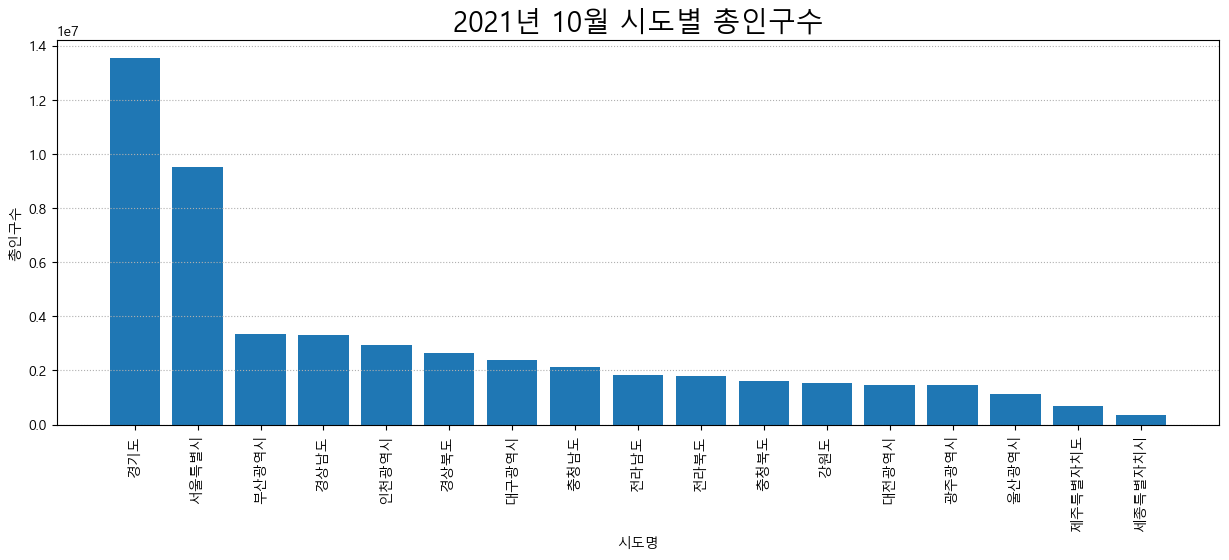

In [36]:
# 1. matplot.pyplot으로 시각화하기
plt.rcParams['figure.figsize']=(15,5)
plt.bar(df_sido['시도명'],df_sido['총인구수'])
plt.xticks(rotation=90)
plt.title('2021년 10월 시도별 총인구수',size=20)
plt.xlabel('시도명')
plt.ylabel('총인구수')
plt.grid(axis='y',ls=':')
plt.show()

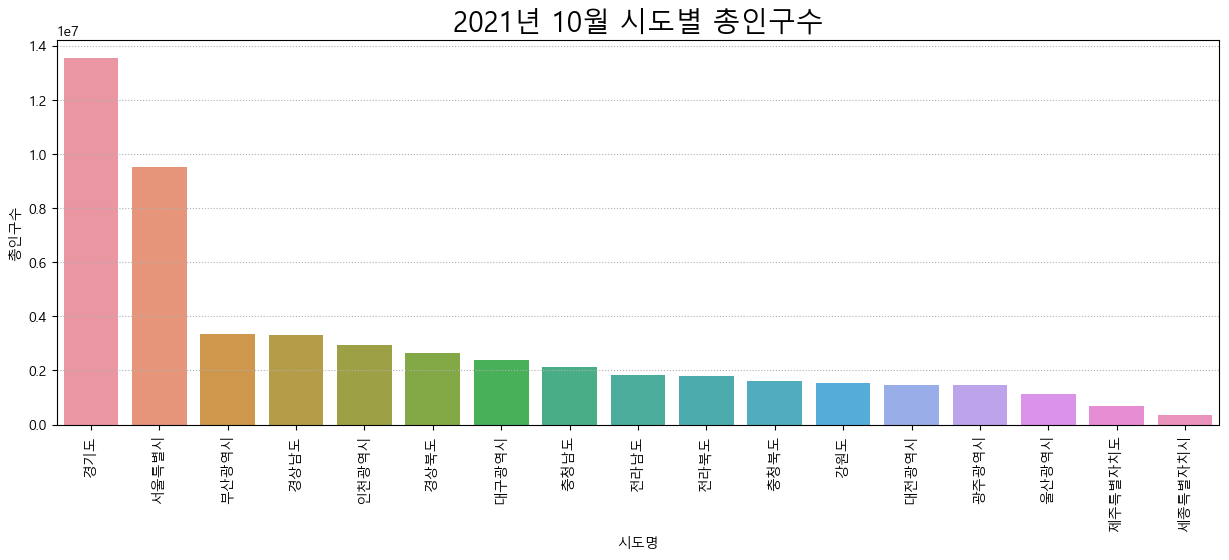

In [41]:
# 2. seaborn으로 시각화하기
sns.barplot(data=df_sido, x='시도명', y='총인구수')
plt.title('2021년 10월 시도별 총인구수',size=20)
plt.grid(axis='y',ls=':')
plt.xticks(rotation=90)
plt.show()

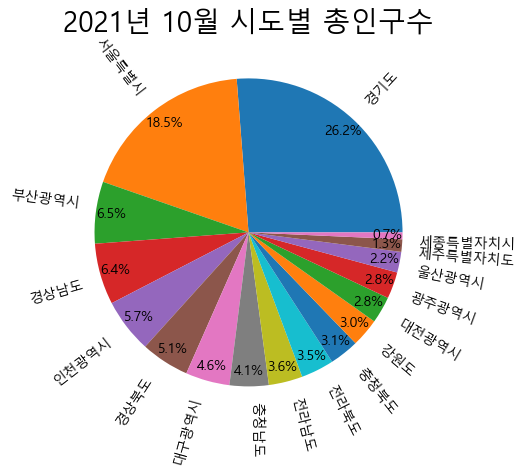

In [48]:
# 파이그래프로 시각화하기
plt.pie(df_sido['총인구수'], labels=df_sido['시도명']
       , autopct='%.1f%%',pctdistance=0.9, rotatelabels=True)
plt.title('2021년 10월 시도별 총인구수',size=20)
plt.show()

In [49]:
# 시도별 세대당 인구 시각화
# 2중 y축 표시하기
# fig,ax1 = plt.subplots()
# ax2=ax1.twinx()

In [51]:
df_sido.head(1)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01,경기도


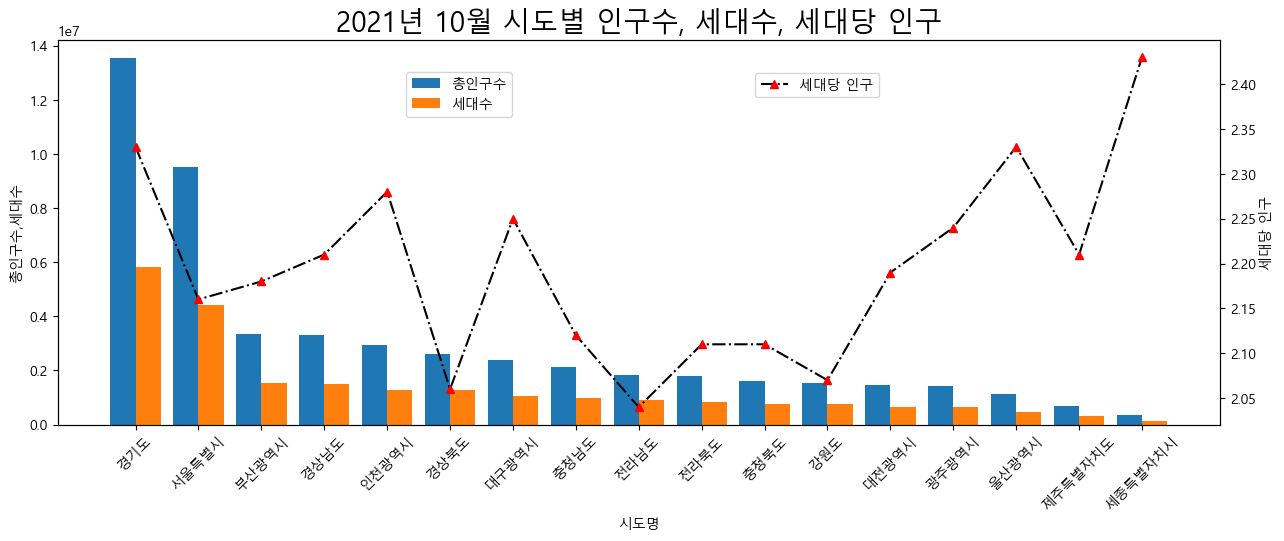

In [69]:
fig,ax1 = plt.subplots()
ax1.bar(df_sido['시도명'],df_sido['총인구수'],width=-0.4,align='edge',label='총인구수')
ax1.bar(df_sido['시도명'],df_sido['세대수'],width=0.4,align='edge',label='세대수')
ax1.legend(loc=(0.3,0.8))
ax1.set_xlabel('시도명')
ax1.set_ylabel('총인구수,세대수')

plt.xticks(rotation=45)

ax2=ax1.twinx()
ax2.plot(df_sido['시도명'],df_sido['세대당 인구'],'k^-.',mfc='r',mec='r',label='세대당 인구')
ax2.legend(loc=(0.6,0.85))
ax2.set_ylabel('세대당 인구')

ax2.set_title('2021년 10월 시도별 인구수, 세대수, 세대당 인구',size=20)

plt.show()

In [70]:
# 시도별 성별 인구 시각화
df_sido.head(3)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01,경기도
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94,서울특별시
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96,부산광역시


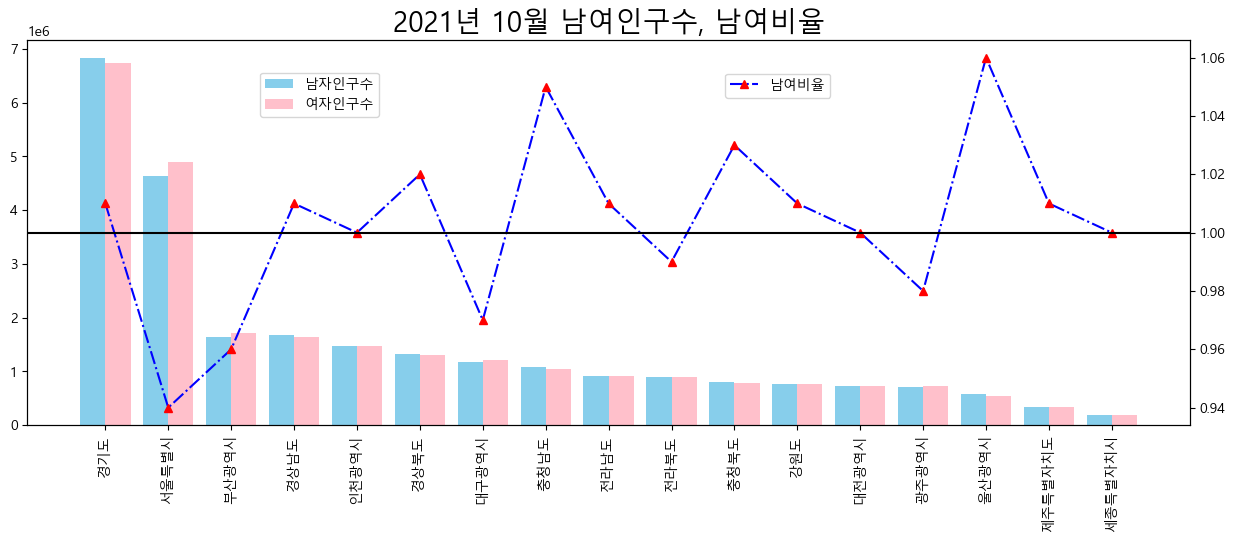

In [85]:
fig,ax1=plt.subplots()
ax1.bar(df_sido['시도명'],df_sido['남자 인구수'],width=-0.4,align='edge',color='skyblue',label='남자인구수')
ax1.bar(df_sido['시도명'],df_sido['여자 인구수'],width=0.4,align='edge',color='pink',label='여자인구수')
ax1.legend(loc=(0.2,0.8))
plt.xticks(rotation=90)

ax2=ax1.twinx()
ax2.plot(df_sido['시도명'],df_sido['남여 비율'],'b^-.',mfc='r',mec='r',label='남여비율')
ax2.legend(loc=(0.6,0.85))
ax2.axhline(1, color='k')
ax2.set_title('2021년 10월 남여인구수, 남여비율',size=20)

plt.show()

In [86]:
# 성별 인구수 차이
# 성별 인구수 차이 컬럼 생성(내림차순으로)

In [88]:
df_sido['남여인구수차이']=df_sido['남자 인구수']-df_sido['여자 인구수']

In [91]:
df_sido=df_sido.sort_values('남여인구수차이', ascending=False)
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명,남여인구수차이
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01,경기도,90473
2265,충청남도 (4400000000),2118977,999286,2.12,1083133,1035844,1.05,충청남도,47289
1187,울산광역시 (3100000000),1122566,481811,2.33,576723,545843,1.06,울산광역시,30880
2095,충청북도 (4300000000),1596948,757980,2.11,810093,786855,1.03,충청북도,23238
3469,경상남도 (4800000000),3318161,1503397,2.21,1670394,1647767,1.01,경상남도,22627
3100,경상북도 (4700000000),2627925,1273579,2.06,1324128,1303797,1.02,경상북도,20331
2754,전라남도 (4600000000),1834653,901203,2.04,923037,911616,1.01,전라남도,11421
1882,강원도 (4200000000),1537717,743798,2.07,774008,763709,1.01,강원도,10299
826,인천광역시 (2800000000),2945009,1294158,2.28,1474536,1470473,1.00,인천광역시,4063
3806,제주특별자치도 (5000000000),676569,306741,2.21,339195,337374,1.01,제주특별자치도,1821


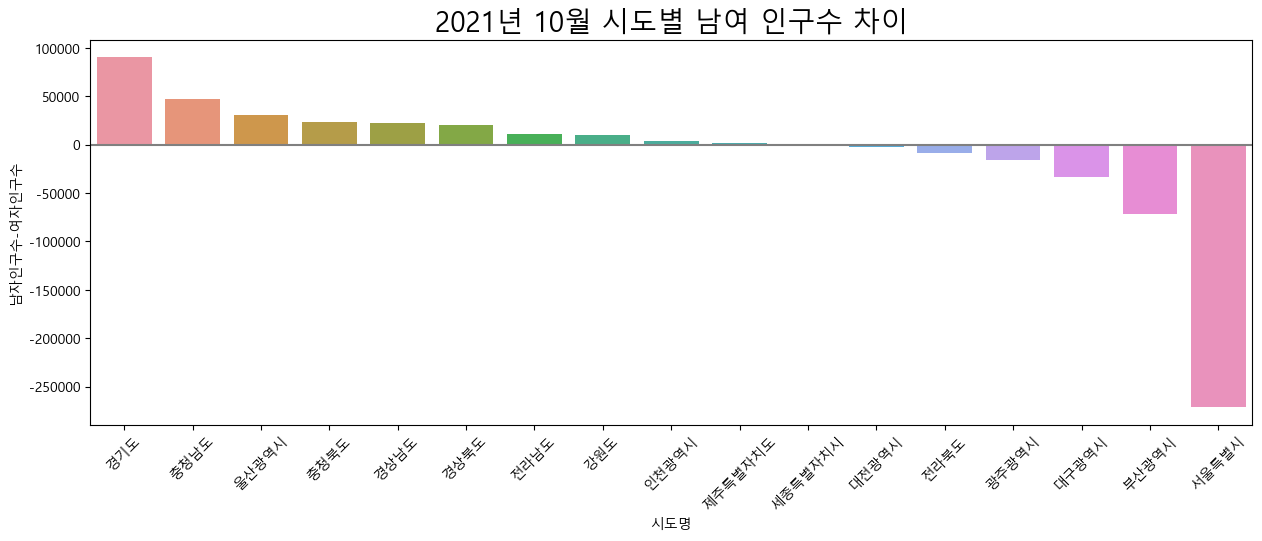

In [96]:
# 시각화
sns.barplot(data=df_sido,x='시도명',y='남여인구수차이')
plt.xticks(rotation=45)
plt.axhline(0, color='gray')
plt.title('2021년 10월 시도별 남여 인구수 차이', size=20)
plt.ylabel('남자인구수-여자인구수')
plt.show()

In [97]:
# 구별, 동별 총 인구수 시각화

In [98]:
# 서울시 구별 인구수 시각화

In [99]:
# 서브셋 생성

In [103]:
df_seoul=df[df['행정구역'].str.find('구 (11')>0].copy()

In [109]:
df_seoul['구']=df_seoul['행정구역'].str.split(' ').str[1]

In [111]:
df_seoul=df_seoul.sort_values('총인구수',ascending=False)
df_seoul.head(3)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,구
404,서울특별시 송파구 (1171000000),659239,282185,2.34,317773,341466,0.93,송파구
256,서울특별시 강서구 (1150000000),575370,270623,2.13,277041,298329,0.93,강서구
381,서울특별시 강남구 (1168000000),533878,234533,2.28,255473,278405,0.92,강남구


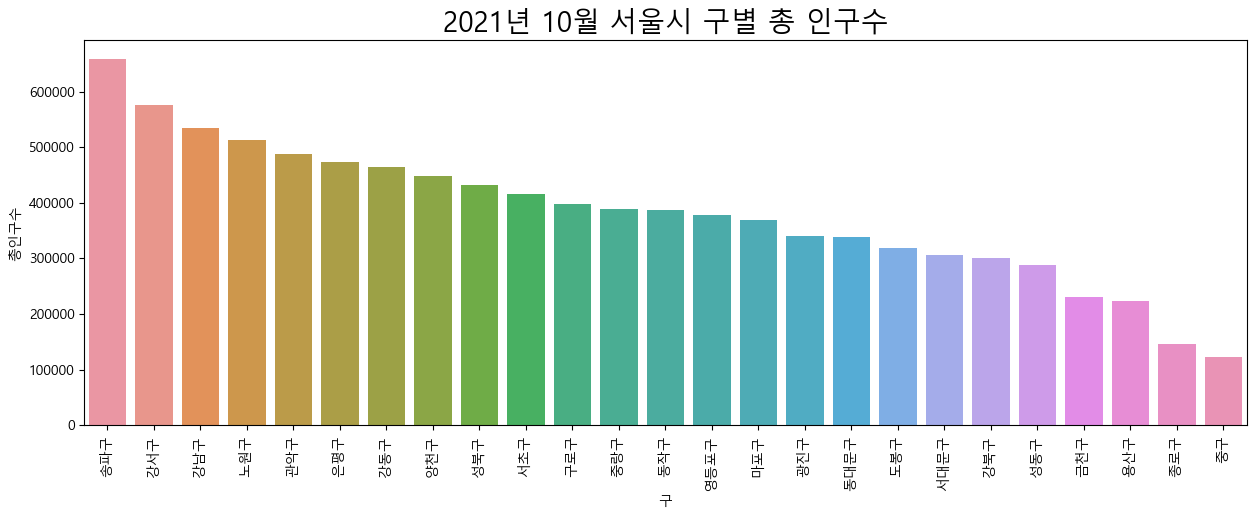

In [114]:
sns.barplot(data=df_seoul,x='구',y='총인구수')
plt.title('2021년 10월 서울시 구별 총 인구수',size=20)
plt.xticks(rotation=90)
plt.show()

In [115]:
# 동별 인구수 시각화
# 송파구 동별 인구수 시각화

In [127]:
df_song=df[df['행정구역'].str.find('동(1171')>0].copy()

In [128]:
df_song['동']=df_song['행정구역'].str.split(' ').str[2].str.split('(').str[0]

In [131]:
df_song=df_song.sort_values('총인구수', ascending=False)

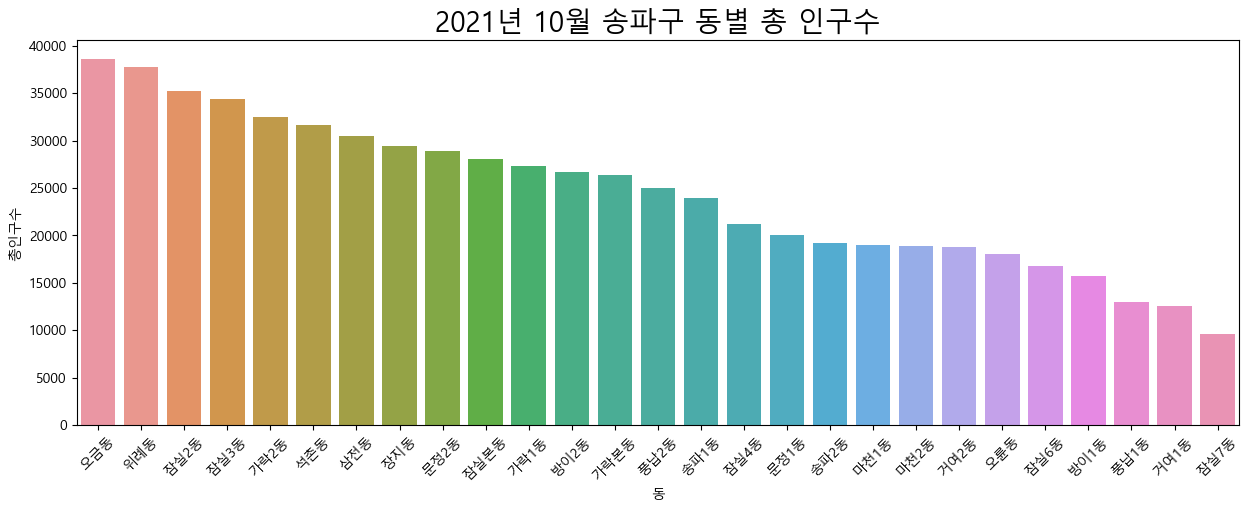

In [134]:
sns.barplot(data=df_song,x='동',y='총인구수')
plt.title('2021년 10월 송파구 동별 총 인구수',size=20)
plt.xticks(rotation=45)
plt.show()